<a href="https://colab.research.google.com/github/mikechase3/ML_housingPriceCAPricePredition/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Data Automatically
We're going to use a script to get the data.

In [1]:
from pathlib import Path
import tarfile
import urllib.request
import pandas as pd


def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():  # if we don't have it locally, download it.
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
data = pd.read_csv("housing.csv")
print(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)  # represents all cols except the median_house_value (Drop/inversed all cols)
y = data['median_house_value']  # represents only the median house value col.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print("done")

done


In [ ]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18407,-121.81,37.27,20.0,3244.0,520.0,1769.0,469.0,5.9214,<1H OCEAN,224000.0
19835,-119.39,36.54,30.0,1408.0,326.0,1184.0,324.0,1.7165,INLAND,59100.0
7461,-118.18,33.93,31.0,1516.0,400.0,1820.0,398.0,2.1641,<1H OCEAN,122900.0
17002,-122.25,37.56,19.0,7976.0,1406.0,3437.0,1338.0,5.6396,NEAR BAY,430300.0
14556,-117.24,32.98,4.0,6423.0,1042.0,2607.0,983.0,7.6348,NEAR OCEAN,337000.0
...,...,...,...,...,...,...,...,...,...,...
7778,-118.08,33.91,30.0,3259.0,942.0,2744.0,895.0,2.8608,<1H OCEAN,165600.0
2911,-119.05,35.36,30.0,4635.0,800.0,2307.0,754.0,3.6548,INLAND,84700.0
20470,-118.74,34.27,23.0,2493.0,522.0,1488.0,505.0,4.1800,<1H OCEAN,215000.0
18261,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,NEAR BAY,465000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

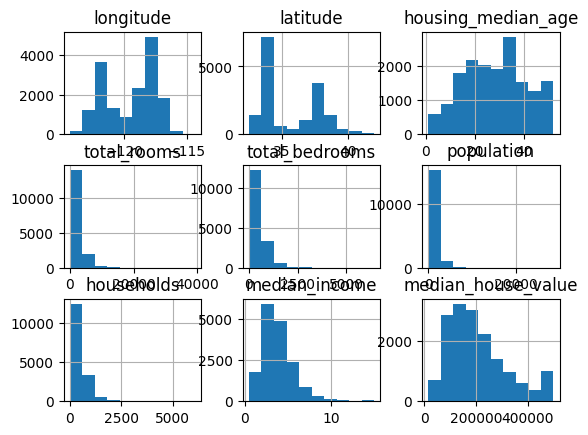

In [ ]:
train_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

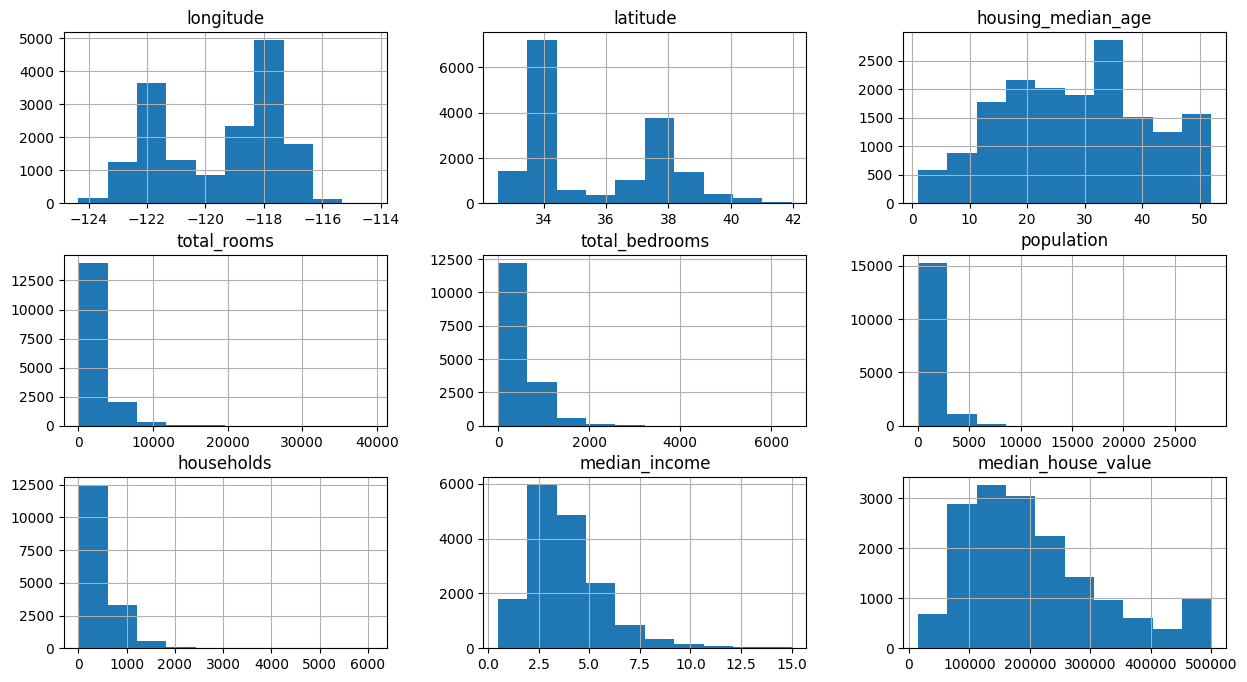

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
print(type(train_data))
# train_data
correlation_mat = train_data.drop('ocean_proximity', axis=1).corr()
# train_data.corr()
correlation_mat.corr()

<class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.984439,-0.194624,0.158968,0.184349,0.222292,0.179507,-0.001510,-0.009531
latitude,-0.984439,1.000000,0.123426,-0.121299,-0.136844,-0.171527,-0.135299,-0.112087,-0.144456
housing_median_age,-0.194624,0.123426,1.000000,-0.806336,-0.755887,-0.747268,-0.750484,-0.130366,0.100878
total_rooms,0.158968,-0.121299,-0.806336,1.000000,0.987184,0.977708,0.987592,-0.082797,-0.179992
total_bedrooms,0.184349,-0.136844,-0.755887,0.987184,1.000000,0.991509,0.999414,-0.224298,-0.283288
population,0.222292,-0.171527,-0.747268,0.977708,0.991509,1.000000,0.993188,-0.239649,-0.317537
households,0.179507,-0.135299,-0.750484,0.987592,0.999414,0.993188,1.000000,-0.214066,-0.271828
median_income,-0.001510,-0.112087,-0.130366,-0.082797,-0.224298,-0.239649,-0.214066,1.000000,0.890521
median_house_value,-0.009531,-0.144456,0.100878,-0.179992,-0.283288,-0.317537,-0.271828,0.890521,1.000000


<Axes: >

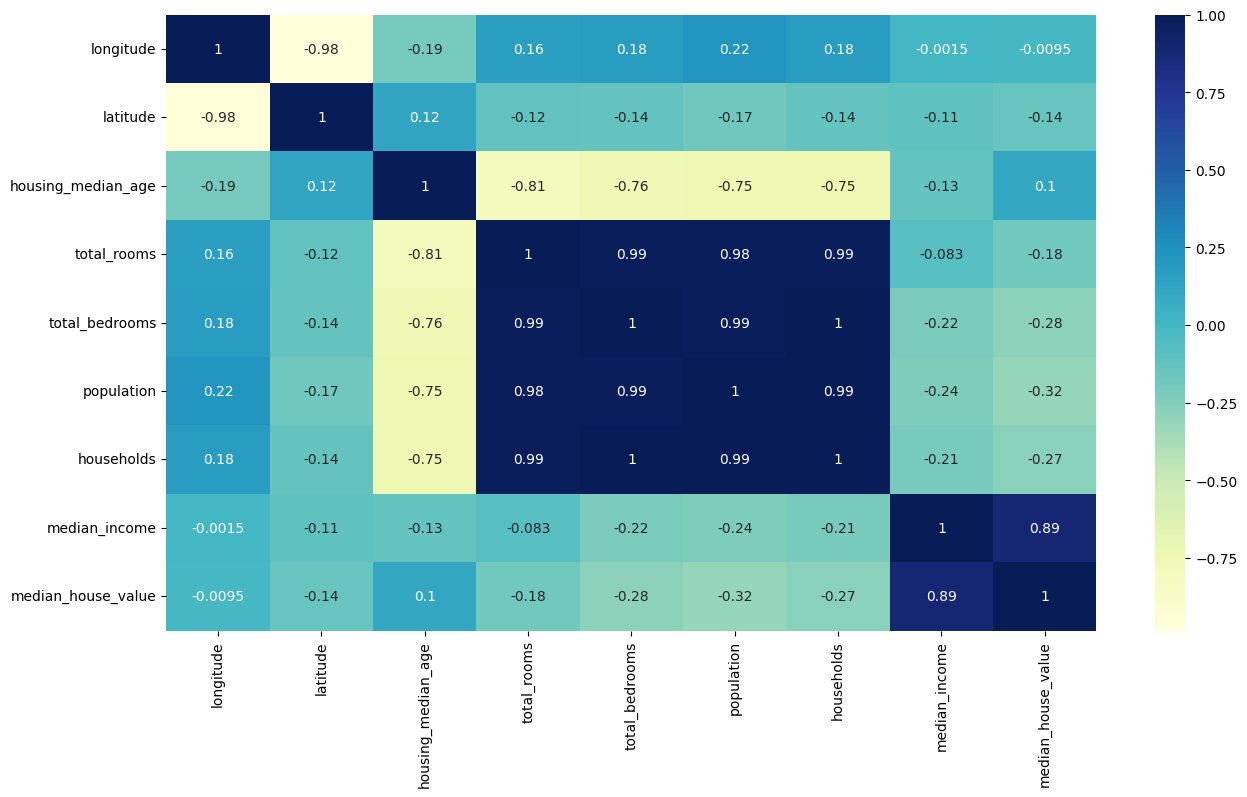

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_mat.corr(), annot=True, cmap="YlGnBu")  # Check for correlated variables! 1 means an exact correlated. 0.9 is closely correlated. -1 isn't